## 공공데이터 과제 #3

1. 대구시의 7개 구별 (중구, 동구, 서구, 남구, 북구, 수성구, 달서구) 남녀 비율 및 대구시
전체의 남녀 비율을 각각의 파이 차트로 나타내시오.
- subplots를 이용하여 4x2 형태의 총 8개의 subplot을 파이 차트로 구현
- gender.csv 파일 사용

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

df=pd.read_csv('gender.csv',encoding='euc_kr')
df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21264\4041790587.py:5: DtypeWarning: Columns (99,100,101,102,103,197,198,199,200,305,306,309) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('gender.csv',encoding='euc_kr')


,행정구역,2022년06월_계_총인구수,2022년06월_계_연령구간인구수,2022년06월_계_0세,2022년06월_계_1세,2022년06월_계_2세,2022년06월_계_3세,2022년06월_계_4세,2022년06월_계_5세,2022년06월_계_6세,...,2022년06월_여_91세,2022년06월_여_92세,2022년06월_여_93세,2022년06월_여_94세,2022년06월_여_95세,2022년06월_여_96세,2022년06월_여_97세,2022년06월_여_98세,2022년06월_여_99세,2022년06월_여_100세 이상
0,서울특별시 (1100000000),"9,494,807","9,494,807","41,427","44,825","46,252","49,895","53,002","58,509","65,624",...,"5,724","4,973","4,121","3,099","2,320","1,472","1,040",766,722,"1,301"
1,서울특별시 종로구 (1111000000),"143,624","143,624",449,479,542,545,594,693,816,...,117,104,82,71,55,27,23,15,13,26
2,서울특별시 종로구 청운효자동(1111051500),"11,803","11,803",43,46,51,50,54,86,83,...,11,5,5,6,1,4,0,3,0,2
3,서울특별시 종로구 사직동(1111053000),"9,310","9,310",31,31,36,48,48,63,68,...,12,10,8,1,3,4,2,1,2,0
4,서울특별시 종로구 삼청동(1111054000),"2,386","2,386",3,7,4,4,12,8,13,...,1,5,1,2,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,제주특별자치도 서귀포시 서홍동(5013058000),"11,254","11,254",75,79,83,104,113,131,164,...,7,3,6,4,0,2,0,0,2,1
3863,제주특별자치도 서귀포시 대륜동(5013059000),"15,411","15,411",115,113,158,151,145,183,161,...,12,11,8,4,6,3,2,1,5,7
3864,제주특별자치도 서귀포시 대천동(5013060000),"13,802","13,802",91,105,121,127,157,189,204,...,9,15,3,8,3,4,0,1,1,3
3865,제주특별자치도 서귀포시 중문동(5013061000),"12,217","12,217",69,73,83,90,84,88,119,...,9,10,7,6,3,4,1,1,1,3


In [10]:
# 행정구역을 '시'랑 '구'로 나누고 원데이터에 있는 행정구역 없애고 대신 넣어 줌
newDF=pd.concat([df['행정구역'].str.split(' ',expand=True).iloc[:,:2],df.iloc[:,1:]],axis=1)
newDF=newDF.rename(columns={0:'시',1:'구'})

In [11]:
# '대구광역시'인 것만 새로운 DF로 저장
daeguDF=newDF[newDF['시']=='대구광역시']
daeguDF.set_index('시',inplace=True)

In [12]:
# '대구광역시' 구역별 고유값 저장
gu=daeguDF['구'].unique()
gu

array(['', '중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '달성군'],
      dtype=object)

In [13]:
male_list=[]
female_list=[]
def sum_population():
    for i in range(len(gu)):
        if i!=len(gu)-1: # 달성군을 뺀 대구광역시 구역별 총인구수 리스트로 저장
            male_list.append(int(daeguDF[daeguDF['구']==gu[i]].iloc[:,104][0].replace(',','')))
            female_list.append(int(daeguDF[daeguDF['구']==gu[i]].iloc[:,207][0].replace(',','')))
    draw_show()

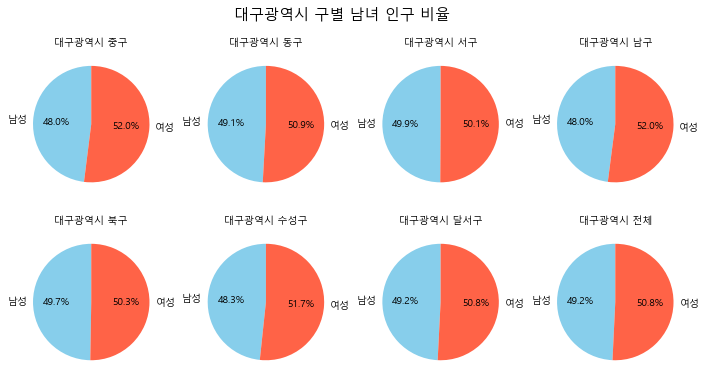

In [15]:
def draw_show():   
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
    
    # 전체 subplot의 개수 설정 (2x4=총8개)
    fig, axes=plt.subplots(2,4,figsize=(12, 6),sharex=True,sharey=True)
    # 전체 그래프의 타이틀 설정
    fig.suptitle('대구광역시 구별 남녀 인구 비율', fontsize=15)
    color=['skyblue','tomato']

    for i in range(len(gu)-1):
        if i==0:
            plt.subplot(2,4,8)
            plt.title('대구광역시'+' 전체',size=10)
        else: 
            plt.subplot(2,4,i)
            plt.title('대구광역시'+' '+gu[i],size=10)
        population=[male_list[i],female_list[i]]
        plt.pie(population,labels=['남성','여성'],autopct='%.1f%%',
               colors=color,startangle=90)
    plt.show()
sum_population()